In [3]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [7]:
def test_get_table(x):
    url = 'https://bitinfocharts.com/bitcoin/address/{}-full'.format(x)
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
    res = requests.get(url, headers)
    df = pd.read_html(res.text)[2]
    df = df[df['Balance, USD'].isnull() != True]
    return df

In [8]:
test_get_table('1Cr7EjvS8C7gfarREHCvFhd9gT3r46pfLb').head()

,Block,Time,Amount,Balance,"Balance, USD"
0,538503,2018-08-26 05:28:10 UTC,+0.00000684 BTC,"17,816.91315866 BTC","$118,008,887 @ $6,623.42"
1,534529,2018-07-31 11:41:50 UTC,+0.00000674 BTC,"17,816.91315182 BTC","$140,846,376 @ $7,905.21"
2,530913,2018-07-07 16:34:43 UTC,+0.00000828 BTC,"17,816.91314508 BTC","$117,424,466 @ $6,590.62"
3,530895,2018-07-07 14:23:53 UTC,+0.00001 BTC,"17,816.9131368 BTC","$117,573,855 @ $6,599"
4,529887,2018-06-30 12:38:13 UTC,+0.00000684 BTC,"17,816.9131268 BTC","$114,231,071 @ $6,411.38"


In [389]:
class address_scrapper(object):
    def __init__(self):
        self.headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
        self.url = 'https://bitinfocharts.com/top-100-richest-bitcoin-addresses.html'
    def get_list(self):
        res = requests.get(self.url, self.headers)
        table_list = pd.read_html(res.text)
        f = table_list[2].drop(['Unnamed: 0'],axis=1)
        s = table_list[3].drop(0,axis=1)
        s.columns = f.columns
        f100 = f.append(s)
        raw_rich_address = list(f100['Address'])
        def clean_address(x):
            if 'of' in x:
                return x.split(' ')[0]
            elif 'wallet:' in x:
                return x.split('wallet:')[0]
            else:
                return x
        rich_address = list(map(clean_address, raw_rich_address))
        return rich_address

In [387]:
a = address_scrapper()

In [282]:
table_list[0]

,Balance,Addresses,% Addresses (Total),Coins,$USD,% Coins (Total)
0,0 - 0.001,10820783,48.85% (100%),"2,244 BTC","14,978,746 USD",0.01% (100%)
1,0.001 - 0.01,4945412,22.33% (51.15%),"20,196 BTC","134,785,912 USD",0.12% (99.99%)
2,0.01 - 0.1,3925690,17.72% (28.83%),"125,093 BTC","834,862,493 USD",0.73% (99.87%)
3,0.1 - 1,1734139,7.83% (11.1%),"561,133 BTC","3,744,972,244 USD",3.26% (99.14%)
4,1 - 10,575962,2.6% (3.27%),"1,513,679 BTC","10,102,212,525 USD",8.79% (95.88%)
5,10 - 100,132286,0.6% (0.67%),"4,366,055 BTC","29,138,824,929 USD",25.35% (87.1%)
6,"100 - 1,000",15446,0.07% (0.08%),"3,717,331 BTC","24,809,269,914 USD",21.59% (61.74%)
7,"1,000 - 10,000",1529,0.01% (0.01%),"3,388,092 BTC","22,611,947,686 USD",19.67% (40.16%)
8,"10,000 - 100,000",119,0% (0%),"3,065,304 BTC","20,457,676,443 USD",17.8% (20.48%)
9,"100,000 - 1,000,000",3,0% (0%),"461,993 BTC","3,083,315,627 USD",2.68% (2.68%)


In [283]:
table_list[1]

,0,1,2,3,4,5,6
0,1 USD,100 USD,"1,000 USD","10,000 USD","100,000 USD","1,000,000 USD","10,000,000 USD"
1,15576423,5131374,1995274,494769,115312,10267,977


In [296]:
f = table_list[2].drop(['Unnamed: 0'],axis=1)

In [297]:
s = table_list[3].drop(0,axis=1)
s.columns = f.columns

In [299]:
f100 = f.append(s)

In [321]:
raw_rich_address = list(f100['Address'])

In [319]:
def clean_address(x):
    if 'of' in x:
        return x.split(' ')[0]
    elif 'wallet:' in x:
        return x.split('wallet:')[0]
    else:
        return x

In [323]:
rich_address = list(map(clean_address, raw_rich_address))

In [326]:
rich_address_short = rich_address[:5]

In [151]:
df_copy = df.copy()

In [381]:
def clean(df):
    df.columns = ['Block', 'Time (UTC)', 'Amount (BTC)', 'Balance (BTC)', 'Balance (USD)']
    def iso(x):
        t = x.split(' ')
        return t[0]+'T'+t[1]+'Z'
    def add(cols):
        year = cols[0]
        month = cols[1]
        date = cols[2]
        return int(str(year)+str(month)+str(date))
    def btc(x):
        x = str(x)[:-4]
        x = x.replace(',','')
        if x.startswith('+'):
            return float(x[1:])
        else:
            return float(x)
    def usd(x):
        x = x.replace('$', '')
        x = x.replace(' ', '')
        x = x.replace(',', '')
        return float(x)
    df['year'] = df['Time (UTC)'].apply(lambda x:x.split('-')[0])
    df['month'] = df['Time (UTC)'].apply(lambda x:x.split('-')[1])
    df['date'] = df['Time (UTC)'].apply(lambda x:x[8:10])
    df['Time (UTC)'] = df['Time (UTC)'].apply(iso)
    df['timestamp'] = df[['year', 'month', 'date']].apply(add,axis=1)
    df['Amount (BTC)'] = df['Amount (BTC)'].apply(btc)
    df['Balance (BTC)'] = df['Balance (BTC)'].apply(btc)
    try:
        df['USD price'] = df['Balance (USD)'].apply(lambda x:x.split('@')[1])
        df['Balance (USD)'] = df['Balance (USD)'].apply(lambda x:x.split('@')[0])
        df['USD price'] = df['USD price'].apply(usd)
        df['Balance (USD)'] = df['Balance (USD)'].apply(usd)
    except AttributeError:
        print('no usd record')
    
    df = df[['Block', 'Time (UTC)', 'year', 'month', 'date', 'timestamp', 'Amount (BTC)', 'Balance (BTC)', 'Balance (USD)', 'USD price']]
    return df

In [190]:
df = clean(df)

In [31]:
df.to_csv('test.csv', index=False)

In [192]:
df.to_csv('test_cleaned.csv', index=False)

In [193]:
df.describe()

,Block,timestamp,Amount (BTC),Balance (BTC),Balance (USD),USD price
count,4822.000000,4.822000e+03,4822.000000,4822.000000,4.822000e+03,4822.000000
mean,486446.335753,2.017308e+07,40.011343,129148.804265,7.897241e+08,5454.050448
std,21574.748695,4.151430e+03,1837.932286,35424.196812,6.692030e+08,4173.679330
min,446739.000000,2.017010e+07,-30000.101232,0.467979,1.275000e+03,814.600000
25%,470004.750000,2.017061e+07,108.742623,108759.313882,2.397694e+08,2258.022500
50%,484165.000000,2.017091e+07,172.747640,122382.081902,4.889316e+08,4283.355000
75%,501433.750000,2.017123e+07,348.307710,156110.533019,1.304942e+09,7920.185000
max,537735.000000,2.018082e+07,62077.140000,206393.529212,2.680469e+09,19666.110000


In [384]:
class rich_scrapper(object):
    def __init__(self, url):
        self.headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
        self.url = url
        
    def get_table(self):
        res = requests.get(self.url, self.headers)
        df = pd.read_html(res.text)[2]
        df = df[df['Balance, USD'].isnull() != True]
        return df
    
    @staticmethod
    def clean_table(df):
        df.columns = ['Block', 'Time (UTC)', 'Amount (BTC)', 'Balance (BTC)', 'Balance (USD)']
        df['year'] = df['Time (UTC)'].apply(lambda x:x.split('-')[0])
        df['month'] = df['Time (UTC)'].apply(lambda x:x.split('-')[1])
        df['date'] = df['Time (UTC)'].apply(lambda x:x[8:10])
        def iso(x):
            t = x.split(' ')
            return t[0]+'T'+t[1]+'Z'
        df['Time (UTC)'] = df['Time (UTC)'].apply(iso)
        def add(cols):
            year = cols[0]
            month = cols[1]
            date = cols[2]
            return int(str(year)+str(month)+str(date))
        df['timestamp'] = df[['year', 'month', 'date']].apply(add,axis=1)
        def btc(x):
            x = str(x)[:-4]
            x = x.replace(',','')
            if x.startswith('+'):
                return float(x[1:])
            else:
                return float(x)
        df['Amount (BTC)'] = df['Amount (BTC)'].apply(btc)
        df['Balance (BTC)'] = df['Balance (BTC)'].apply(btc)
        df['USD price'] = df['Balance (USD)'].apply(lambda x:x.split('@')[1])
        df['Balance (USD)'] = df['Balance (USD)'].apply(lambda x:x.split('@')[0])
        def usd(x):
            x = x.replace('$', '')
            x = x.replace(' ', '')
            x = x.replace(',', '')
            return float(x)
        df['USD price'] = df['USD price'].apply(usd)
        df['Balance (USD)'] = df['Balance (USD)'].apply(usd)
        df = df[['Block', 'Time (UTC)', 'year', 'month', 'date', 'timestamp', 'Amount (BTC)', 'Balance (BTC)', 'Balance (USD)', 'USD price']]
        return df

In [274]:
t = rich_scrapper('https://bitinfocharts.com/bitcoin/address/3D2oetdNuZUqQHPJmcMDDHYoqkyNVsFk9r-full')

In [276]:
t.get_table().head()

,Block,Time,Amount,Balance,"Balance, USD"
0,537917,2018-08-22 07:36:37 UTC,+261.15075 BTC,"187,956.73597476 BTC","$1,257,845,609 @ $6,692.21"
1,537914,2018-08-22 07:21:31 UTC,"+1,378.96983 BTC","187,695.58522476 BTC","$1,256,097,934 @ $6,692.21"
2,537913,2018-08-22 07:06:00 UTC,+134.22546 BTC,"186,316.61539476 BTC","$1,246,869,581 @ $6,692.21"
3,537905,2018-08-22 05:46:55 UTC,+184.03042 BTC,"186,182.38993476 BTC","$1,246,529,904 @ $6,695.21"
4,537868,2018-08-22 00:35:58 UTC,+129.46945 BTC,"185,998.35951476 BTC","$1,253,903,409 @ $6,741.48"


In [278]:
t.clean_table(t.get_table()).head()

,Block,Time (UTC),year,month,date,timestamp,Amount (BTC),Balance (BTC),Balance (USD),USD price
0,537917,2018-08-22T07:36:37Z,2018,08,22,20180822,261.15075,187956.735975,1.257846e+09,6692.21
1,537914,2018-08-22T07:21:31Z,2018,08,22,20180822,1378.96983,187695.585225,1.256098e+09,6692.21
2,537913,2018-08-22T07:06:00Z,2018,08,22,20180822,134.22546,186316.615395,1.246870e+09,6692.21
3,537905,2018-08-22T05:46:55Z,2018,08,22,20180822,184.03042,186182.389935,1.246530e+09,6695.21
4,537868,2018-08-22T00:35:58Z,2018,08,22,20180822,129.46945,185998.359515,1.253903e+09,6741.48


In [334]:
all_list = []
for i in rich_address_short:
    t = rich_scrapper('https://bitinfocharts.com/bitcoin/address/{}-full'.format(i))
    df = t.clean_table(t.get_table())
    df['address'] = i
    all_list.append(df)
df_sum = pd.concat(all_list).sort_values(by='Block', ascending=False)

In [385]:
for i in rich_address_short:
    print(i, rich_address_short.index(i))

3D2oetdNuZUqQHPJmcMDDHYoqkyNVsFk9r 0
16ftSEQ4ctQFDtVZiUBusQUjRrGhM3JYwe 1
16rCmCmbuWDhPjWTrpQGaU3EPdZF7MTdUk 2
3Cbq7aT1tY8kMxWLbitaG7yT6bPbKChq64 3
3Nxwenay9Z8Lc9JBiywExpnEFiLp6Afp8v 4


In [391]:
all_list = []
a = address_scrapper()
rich_address = a.get_list()
for i in rich_address:
    print(i, rich_address.index(i))
    t = rich_scrapper('https://bitinfocharts.com/bitcoin/address/{}-full'.format(i))
    df = t.clean_table(t.get_table())
    df['address'] = i
    df['rank'] = rich_address.index(i) + 1
    all_list.append(df)
df_sum = pd.concat(all_list).sort_values(by='Block', ascending=False)

3D2oetdNuZUqQHPJmcMDDHYoqkyNVsFk9r 0
16ftSEQ4ctQFDtVZiUBusQUjRrGhM3JYwe 1
16rCmCmbuWDhPjWTrpQGaU3EPdZF7MTdUk 2
3Cbq7aT1tY8kMxWLbitaG7yT6bPbKChq64 3
3Nxwenay9Z8Lc9JBiywExpnEFiLp6Afp8v 4
183hmJGRuTEi2YDCWy5iozY8rZtFwVgahM 5
1FeexV6bAHb8ybZjqQMjJrcCrHGW9sb6uF 6
18rnfoQgGo1HqvVQaAN4QnxjYE7Sez9eca 7
1HQ3Go3ggs8pFnXuHVHRytPCq5fGG8Hbhx 8
1PnMfRF2enSZnR6JSexxBHuQnxG8Vo5FVK 9
1AhTjUMztCihiTyA4K6E3QEpobjWLwKhkR 10
1DiHDQMPFu4p84rkLn6Majj2LCZZZRQUaa 11
1EBHA1ckUWzNKN7BMfDwGTx6GKEbADUozX 12
1LdRcdxfbSnmCYYNdeYpUnztiYzVfBEQeC 13
1JCe8z4jJVNXSjohjM4i9Hh813dLCNx2Sy 14
1AC4fMwgY8j9onSbXEWeH6Zan8QGMSdmtA 15
12YygZpCEC8VED2oSMQdWCq5xBnHo9ts1Z 16
38UmuUqPCrFmQo4khkomQwZ4VbY2nZMJ67 17
323ENWgPNZdzsm2d6CzEaPTFrvavn1giv5 18
37x6JnDNhbsBw95bvEreB7WHWA74gGR17y 19
bc1q9sh6544xls87x7skjzyfhkty4wq7z76vn7qzq9 20
3CqBquEFMYY548fNBz8u2MBw3HKprS3Xft 21
3Ap6mixhHLmVtH41YHH94Ut4jBfmqRpzgQ 22
33VMRgxXZWgZGmGnGRZ9AEW8bZs8scMiY1 23
17hf5H8D6Yc4B7zHEg3orAtKn7Jhme7Adx 24
3R1hBCHURkquAjFUv1eH5u2gXqooJkjg4B 25
36TEhDpuSJnVbG

In [395]:
df_sum.drop(['Balance (BTC)', 'Balance (USD)'],axis=1,inplace=True)

In [397]:
df_sum.to_csv('f100.csv',index=False)

In [400]:
df_sum.head(15)

,Block,Time (UTC),year,month,date,timestamp,Amount (BTC),USD price,address,rank
0,538049,2018-08-23T03:34:37Z,2018,08,23,20180823,-49.102777,6411.63,1NDyJtNTjmwk5xPNhjgAMu4HDHigtobu1s,70
1,538048,2018-08-23T03:24:18Z,2018,08,23,20180823,-11.642328,6411.63,1NDyJtNTjmwk5xPNhjgAMu4HDHigtobu1s,70
2,538047,2018-08-23T03:13:43Z,2018,08,23,20180823,-64.844140,6411.63,1NDyJtNTjmwk5xPNhjgAMu4HDHigtobu1s,70
3,538046,2018-08-23T02:52:07Z,2018,08,23,20180823,49.090497,6411.63,1NDyJtNTjmwk5xPNhjgAMu4HDHigtobu1s,70
4,538045,2018-08-23T02:39:42Z,2018,08,23,20180823,-4.777281,6411.63,1NDyJtNTjmwk5xPNhjgAMu4HDHigtobu1s,70
5,538044,2018-08-23T02:36:33Z,2018,08,23,20180823,-64.216340,6411.63,1NDyJtNTjmwk5xPNhjgAMu4HDHigtobu1s,70
0,538044,2018-08-23T02:36:33Z,2018,08,23,20180823,12.701503,6411.63,155fzsEBHy9Ri2bMQ8uuuR3tv1YzcDywd4,76
6,538043,2018-08-23T02:15:50Z,2018,08,23,20180823,15.261787,6411.63,1NDyJtNTjmwk5xPNhjgAMu4HDHigtobu1s,70
7,538042,2018-08-23T02:13:15Z,2018,08,23,20180823,50.971469,6411.63,1NDyJtNTjmwk5xPNhjgAMu4HDHigtobu1s,70
8,538041,2018-08-23T01:53:55Z,2018,08,23,20180823,-45.513337,6433.75,1NDyJtNTjmwk5xPNhjgAMu4HDHigtobu1s,70


In [401]:
df_sum.columns

Index(['Block', 'Time (UTC)', 'year', 'month', 'date', 'timestamp',
       'Amount (BTC)', 'USD price', 'address', 'rank'],
      dtype='object')

In [350]:
df_t = pd.concat(all_list).sort_values(by='Block', ascending=False)

In [358]:
import matplotlib

In [366]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([2.31243839e-05, 1.53828668e-07, 1.60983490e-08]),
 array([-36704.        ,   6224.93666667,  49153.87333333,  92082.81      ]),
 <a list of 3 Patch objects>)

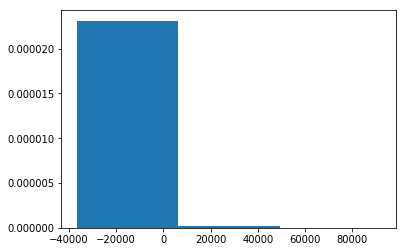

In [376]:
plt.hist(df_t['Amount (BTC)'], density=1, bins=3)

In [200]:
coinbase = pd.read_csv('/Users/gary/Downloads/hitbtcUSD.csv')

In [203]:
coinbase.columns = ['timestamp','price','v']

In [206]:
coinbase['v'].max()

418.91

In [207]:
from datetime import datetime

In [209]:
coinbase['timestamp'] = coinbase['timestamp'].apply(lambda x:datetime.fromtimestamp(x))

In [214]:
coinbase['v'].mean()

0.23913212657065963

In [236]:
url = 'https://explorer.bitcoin.com/api/btc/txs/?block=0000000000000000000ba4120e4194a8cbc2fcea4d5f4a4287440c7fb4a42e8d&pageNum=0'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
res = requests.get(url, headers)

In [232]:
bit_record = pd.read_html(res.text)

ValueError: No tables found

In [226]:
bit_record[0]

,0,1
0,Number Of Transactions,801
1,Output Total,"1,354.41567549 BTC"
2,Transaction Fees,0.02699039 BTC
3,Height,537890
4,Time,2018-08-22 03:31:29 UTC
5,Difficulty,6389316883511.96484375
6,Bits,388763047
7,Size,"448,858(bytes)"
8,Version,536870912
9,Nonce,2817050676


In [227]:
bit_record[1]

,0,1
0,Hash,0000000000000000002236f104e4ee6f339c27649b2b59...
1,Previous Block,00000000000000000021b76b587686ad897441b9eeb443...
2,Next Block(s),00000000000000000027f0fcb076f43dd45045a7e492ac...
3,Merkle Root,cd8b13c96aed4372515bb83e0a899638705627a26768f4...


In [228]:
bit_record[2]

,0,1,2,3,4,5,6
0,tx:aaa95ca39cd8579b41bab269f54ac7f1001a5724d45...,NaN,NaN,NaN,NaN,NaN,NaN
1,Newly Generated,NaN,1Nh7uHdvY6fNwtQtM1G5EZAFPLC33B59..rB,12.52699039 BTC,NaN,NaN,NaN
2,NaN,Unable to decode addressMetadata: !{-Y`zi.;k,0 BTC,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tx:f9e92e1d33ac4aef5b2e0719a1e00e04b9cc85f8ab2...,NaN,NaN,NaN,NaN,NaN,NaN
5,prev tx,3M3586zGRHSeQcWQbFxygvLqaiQuMUg9..mb,-0.08 BTC,NaN,13UF4SEVdAnTCsPhvsiG9h9hjWeo3bnx..AQ,0.00876612 BTC,NaN
6,prev tx,1u5mrLhLYsKa7AhxwsRjeqpbpTMPdqY..ST,-0.07440043 BTC,1Av3yEm4Qfhm8PoQ9MTiVFEPPGAKNEci..r2,0.15461726 BTC,NaN,NaN
7,prev tx,1MRJfemAbgy5VB3zcqn331gn1H82NQqn..Y3,-0.01047415 BTC,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,tx:8c4bbf85e01d28b6c6741ed97d0aa2705d350099fc3...,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
url = 'https://explorer.bitcoin.com/api/btc/txs/?block=0000000000000000000ba4120e4194a8cbc2fcea4d5f4a4287440c7fb4a42e8d&pageNum=0'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
res = requests.get(url, headers)

In [237]:
soup = BeautifulSoup(res.text)

In [240]:
import json

In [253]:
for i in range(10):
    print(json.loads(res.text)['txs'][i]['valueOut'])

12.6271066
15.0091
50.0091
0.95706601
0.88813951
0.81921301
0.75028651
42.78652715
0.22981524
2.73e-05


In [234]:
soup.find_all('td', {'class':'ss2'})

[]

In [1]:
import pandas as pd

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
pd.read_csv('f100.csv')

,Block,Time (UTC),year,month,date,timestamp,Amount (BTC),USD price,address,rank
0,538049,2018-08-23T03:34:37Z,2018,8,23,20180823,-4.910278e+01,6411.630,1NDyJtNTjmwk5xPNhjgAMu4HDHigtobu1s,70
1,538048,2018-08-23T03:24:18Z,2018,8,23,20180823,-1.164233e+01,6411.630,1NDyJtNTjmwk5xPNhjgAMu4HDHigtobu1s,70
2,538047,2018-08-23T03:13:43Z,2018,8,23,20180823,-6.484414e+01,6411.630,1NDyJtNTjmwk5xPNhjgAMu4HDHigtobu1s,70
3,538046,2018-08-23T02:52:07Z,2018,8,23,20180823,4.909050e+01,6411.630,1NDyJtNTjmwk5xPNhjgAMu4HDHigtobu1s,70
4,538045,2018-08-23T02:39:42Z,2018,8,23,20180823,-4.777281e+00,6411.630,1NDyJtNTjmwk5xPNhjgAMu4HDHigtobu1s,70
5,538044,2018-08-23T02:36:33Z,2018,8,23,20180823,-6.421634e+01,6411.630,1NDyJtNTjmwk5xPNhjgAMu4HDHigtobu1s,70
6,538044,2018-08-23T02:36:33Z,2018,8,23,20180823,1.270150e+01,6411.630,155fzsEBHy9Ri2bMQ8uuuR3tv1YzcDywd4,76
7,538043,2018-08-23T02:15:50Z,2018,8,23,20180823,1.526179e+01,6411.630,1NDyJtNTjmwk5xPNhjgAMu4HDHigtobu1s,70
8,538042,2018-08-23T02:13:15Z,2018,8,23,20180823,5.097147e+01,6411.630,1NDyJtNTjmwk5xPNhjgAMu4HDHigtobu1s,70
9,538041,2018-08-23T01:53:55Z,2018,8,23,20180823,-4.551334e+01,6433.750,1NDyJtNTjmwk5xPNhjgAMu4HDHigtobu1s,70
